# SI cross section vs exposure plots
* Code to load in CYGNUS limit data for spin-independent WIMP-proton cross section

## First choose which target to plot for:

In [29]:
#target = 'F'
target = 'He'

## Then load in data:

In [30]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
froot = "../data/CYGNUS-Exposure-"
fname = ["" for x in range(0,10)]
fname[0] ="Ideal"
fname[1] ="Pixel"
fname[2] ="Predrift"
fname[3] ="Postdrift"
fname[4] ="Strip"
fname[5] ="Optical"
fname[6] ="Wire"
fname[7] ="Pad"
fname[8] ="Planar"
fname[9] ="Nondirectional"

data_all_F = zeros(shape=(10,20))
data_all_He = zeros(shape=(10,20))
for i in range(0,10):
    data = loadtxt(froot+fname[i]+".txt")
    V = data[0,:]
    DLF = data[1,:]
    DLHe = data[4,:]
    m,DLF,He = data[0,:], data[1,:], data[2,:]
    m,DLF,He = data[0,:], data[1,:], data[2,:]


    data_all_F[i,:] = DLF
    data_all_He[i,:] = DLHe

if target=='F':
    data_all = data_all_F
    NB8 = data[2,:]
    mass = 9
else:
    data_all = data_all_He
    NB8 = data[5,:]
    mass = 3

## Then plot

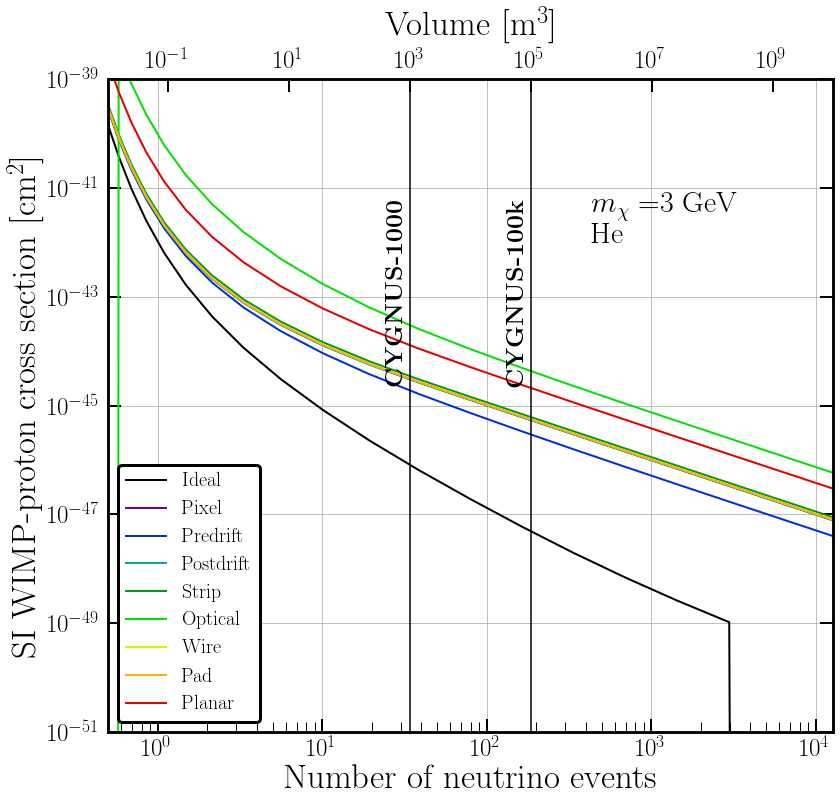

In [40]:
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=25)

fig, ax1 = plt.subplots()
fig.set_size_inches(13,12)

col = cm.nipy_spectral(linspace(0,1,10))
col[0,:] = [0,0,0,1]
col[-1,:] = [0,0,0,1]

xmin = 0.001
xmax = 1.0e10
ymax = 1.0e-39
ymin = 1.0e-51

for i in range(0,9):
    ax1.loglog(NB8,data_all[i,:],'-',linewidth=2,color=col[i,:],label=fname[i])

# Labels
ax1.set_xlabel(r"Number of neutrino events",fontsize=35)
ax1.set_ylabel(r"SI WIMP-proton cross section [cm$^2$]",fontsize=35)
ax1.set_xlim([NB8[0],NB8[-1]])

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xlabel(r'Volume [m$^3$]',fontsize=35,labelpad=15)  # we already handled the x-label with ax1
ax2.set_xlim([V[0],V[-1]])
ax2.loglog([1000,1000],[ymin,ymax],'k-')
ax2.loglog([1e5,1e5],[ymin,ymax],'k-')
for i in range(0,9):
    ax2.loglog(-NB8,data_all[i,:],'-',linewidth=2,color=col[i,:],label=fname[i])
ax2.text(400,3e-42,r'{\bf CYGNUS-1000}',fontsize=25,rotation=90)
ax2.text(40000,3e-42,r'{\bf CYGNUS-100k}',fontsize=25,rotation=90)
ax2.text(1e6,3e-42,r'$m_\chi = $'+str(mass)+' GeV',fontsize=30)
ax2.text(1e6,1e-42,target,fontsize=30)

# Style
ax1.grid()
#ax2.grid()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_ylim(bottom=ymin, top=ymax)
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=False,pad=7)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=False)
ax2.tick_params(which='major',direction='in',width=2,length=13,bottom=False,top=True,pad=7)
ax2.tick_params(which='minor',direction='in',width=1,length=10,bottom=False,top=True)
leg1 = ax2.legend(fontsize=20,frameon=True,loc="lower left",framealpha=1)
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")

plt.show()
fig.savefig('../plots/CYGNUS-Exposure-'+target+'.pdf',bbox_inches='tight')


In [6]:
shape(data)

(7, 20)

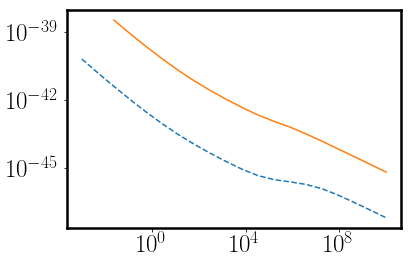

In [42]:
data = loadtxt(froot+fname[9]+".txt")
plt.loglog(data[0,:],data[1,:],'--')
plt.loglog(data[0,:],data[4,:])
plt.show()

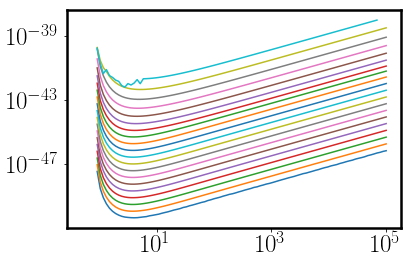

In [70]:
data = loadtxt('../code/nuTest-He.txt')
Ex = data[0,1:]
DL = data[1:,1:]
m = data[1:,0]
nm = size(m)
n_ex = size(Ex)
for i in range(0,n_ex):
    plt.loglog(m,DL[:,i])
plt.show()


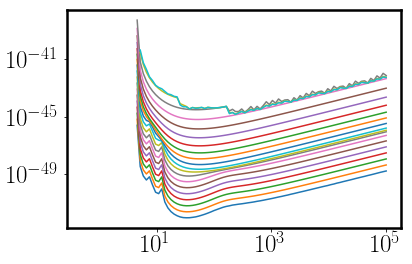

In [71]:
data = loadtxt('../code/nuTest-F.txt')
Ex = data[0,1:]
DL = data[1:,1:]
m = data[1:,0]
nm = size(m)
n_ex = size(Ex)
for i in range(0,n_ex):
    plt.loglog(m,DL[:,i])
plt.show()


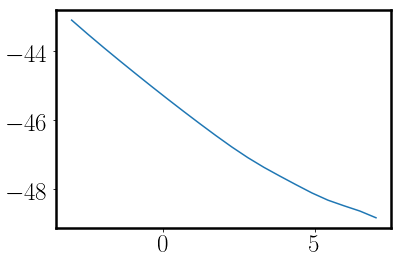

In [63]:

plt.plot(flipud((log10(Ex))),(log10(DL[50,:])))
plt.show()


In [55]:
diff(Ex)

array([  2.35981839e-03,   7.92856096e-03,   2.66385240e-02,
         8.95005999e-02,   3.00705752e-01,   1.01031668e+00,
         3.39448045e+00,   1.14048375e+01,   3.83181813e+01,
         1.28742126e+02,   4.32550148e+02,   1.45328989e+03,
         4.88278995e+03,   1.64052869e+04,   5.51187828e+04,
         1.85189094e+05,   6.22201703e+05,   2.09048465e+06,
         7.02364855e+06])